# FRE6091_Albert_Lee_HW5

In [1]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats
import numpy as np
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf; yf.pdr_override()
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
%matplotlib inline

In [3]:
data = pdr.get_data_yahoo("AAPL", start="2019-2-28", end="2020-3-1")
data['daily price %chg'] = data['Close'].pct_change()
data['daily price %chg^2'] = data['daily price %chg']**2 
data.dropna(inplace=True)
print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed
(252, 8)


,Open,High,Low,Close,Adj Close,Volume,daily price %chg,daily price %chg^2
Date,,,,,,,,
2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,0.010511,0.000110
2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,0.005029,0.000025
2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,-0.001820,0.000003
2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,-0.005754,0.000033
2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,-0.011575,0.000134


### Problem 1 : Pick a stock and find the observed ACF of both daily change in price and daily change in price squared.

In [4]:
pchg = data['daily price %chg']
n=10
cov = np.zeros(n+1)
cor = np.zeros(n+1)
mu = np.mean(pchg)
sig = np.var(pchg)
for i in range(n+1):
    xt = pchg[:len(pchg)-i]
    xtj = pchg[i:len(pchg)]
    temp = mu * np.ones(len(xt))
    cov[i] = np.dot((xt - temp), (xtj - temp)) / (len(pchg))
    cor[i] = cov[i] / sig
d1 = pd.DataFrame(cor, columns=['ACF'])
d1.index.name = 'Lag'
print("ACF of daily price change\n")
print(d1)

ACF of daily price change

          ACF
Lag          
0    1.000000
1   -0.000146
2   -0.057082
3   -0.016564
4    0.123076
5    0.090960
6   -0.034281
7    0.045073
8   -0.028920
9    0.123531
10  -0.101941


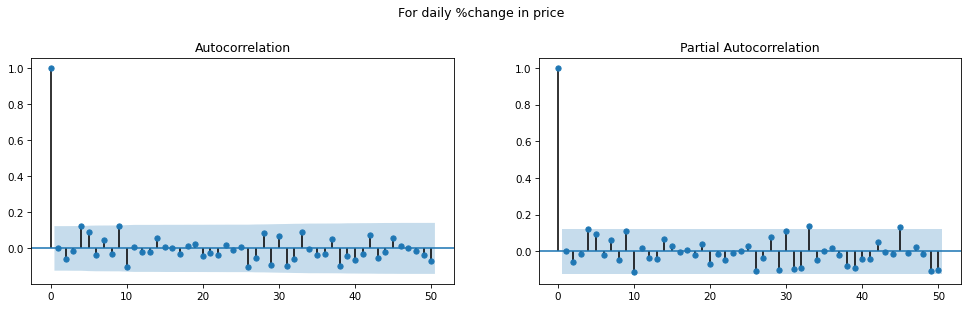

In [5]:
fig, axes = plt.subplots(1,2,figsize=(16,4), dpi= 75)
fig.suptitle("For daily %change in price", y=1.05)
plot_acf(data['daily price %chg'].tolist(), lags=50, ax=axes[0]);
plot_pacf(data['daily price %chg'].tolist(), lags=50, ax=axes[1]);

In [6]:
pchg2 = data['daily price %chg^2']
n=10
cov2 = np.zeros(n+1)
cor2 = np.zeros(n+1)
mu2 = np.mean(pchg2)
sig2 = np.var(pchg2)
for i in range(n+1):
    xt = pchg2[:len(pchg2)-i]
    xtj = pchg2[i:len(pchg2)]
    temp = mu2 * np.ones(len(xt))
    cov2[i] = np.dot((xt - temp), (xtj - temp)) / (len(pchg2))
    cor2[i] = cov2[i] / sig2
cor2 = pd.Series(cor2)
print("ACF of daily price change squared\n")
d2 = pd.DataFrame(cor2, columns=['ACF'])
d2.index.name = 'Lag'
print(d2)


ACF of daily price change squared

          ACF
Lag          
0    1.000000
1    0.041382
2    0.068646
3    0.120610
4    0.042940
5   -0.010517
6    0.030672
7    0.035114
8    0.152102
9   -0.012556
10  -0.002902


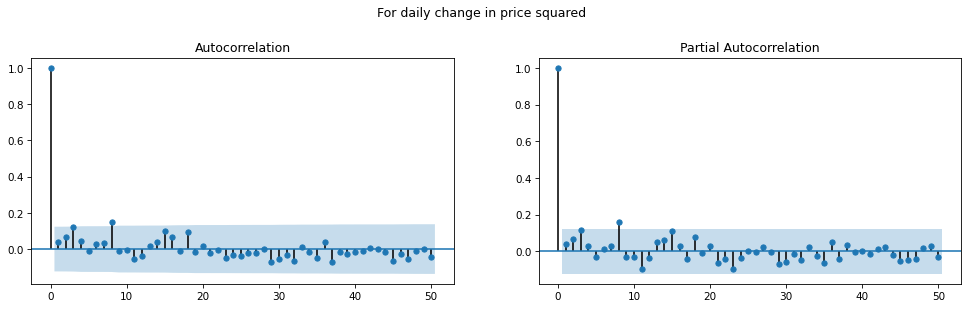

In [7]:
fig, axes = plt.subplots(1,2,figsize=(16,4), dpi= 75)
fig.suptitle("For daily change in price squared", y=1.05)
plot_acf(data['daily price %chg^2'].tolist(), lags=50, ax=axes[0]);
plot_pacf(data['daily price %chg^2'].tolist(), lags=50, ax=axes[1]);

### Problem 2 : Apply the Ljung-Box test to see if the correlations from problem 1 are significant.

**H0:** The data are independently distributed (autocorrelations of the samples are 0)  
**H1:** H0 is not True  
  
Ljung-Box statistic: $Q=n(n+2)\Sigma_{i=1}^k\frac{r_{i}^2}{n-i}$  
Significane level: $\alpha=0.05$ (95% confidence)  
  
$Q>\chi_{0.95, h}^2$   for h=1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [8]:
cval = np.array([2.706, 4.605, 6.251, 7.779, 9.236, 10.645, 12.017, 13.362, 14.684, 15.987])

In [23]:
Q1 = np.zeros(n)
j = len(pchg)
print(j)
for i in range(n):
    Q1[i] = j*(j+2)*sum([cor[k+1]**2 / (j - k - 1) for k in range(i+1)])
    print(Q1[i])
Q1 = pd.Series(Q1, index=np.arange(1, len(Q1)+1))

252
5.472655977010788e-06
0.8342418585949113
0.9047673969053541
4.814355122367958
6.958434875239422
7.264217358214183
7.7949868615970805
8.014389264427768
12.033950516157978
14.782570702054176


In [10]:
a1 = pd.Series(Q1 > cval, index=np.arange(1, len(Q1)+1))

In [11]:
df1 = pd.DataFrame({'Q satsitic': Q1, 'Reject Null?': a1})
df1.index.name = 'Lag'
print(df1)

     Q satsitic  Reject Null?
Lag                          
1      0.000005         False
2      0.834242         False
3      0.904767         False
4      4.814355         False
5      6.958435         False
6      7.264217         False
7      7.794987         False
8      8.014389         False
9     12.033951         False
10    14.782571         False


In [12]:
Q2 = np.zeros(n)
j = len(pchg2)
for i in range(n):
    Q2[i] = j*(j+2)*sum([cor2[k+1]**2 / (j - k - 1) for k in range(i+1)])
Q2 = pd.Series(Q2, index=np.arange(1, len(Q1)+1))

In [13]:
a2 = pd.Series(Q2 > cval, index=np.arange(1, len(Q2)+1))

In [14]:
df2 = pd.DataFrame({'Q satsitic': Q2, 'Reject Null?': a2})
df2.index.name = 'Lag'
print("")
print(df2)


     Q satsitic  Reject Null?
Lag                          
1      0.436694         False
2      1.643189         False
3      5.382557         False
4      5.858449         False
5      5.887113         False
6      6.131901         False
7      6.454025         False
8     12.522979         False
9     12.564504         False
10    12.566731         False


### Problem 3 : Choose an ARCH(1) model for daily price change. Run a simulation of stock movements.  Plot the movements and find the skew and kurtosis your data. How does it compare to the normal distribution?  Repeat for an ARCH(2) model. 

In [15]:
at = np.zeros(100)
c0 = 0.9
c1 = np.sqrt(.31)
sigSq = np.zeros(100)
sigSq[0] = 0.8
w = np.random.normal(size=(100))
at[0] = 0.1


for i in range(1, len(at)):
    sigSq[i] = c0 + c1 * at[i-1]**2
    at[i] = np.sqrt(sigSq[i]) * w[i]

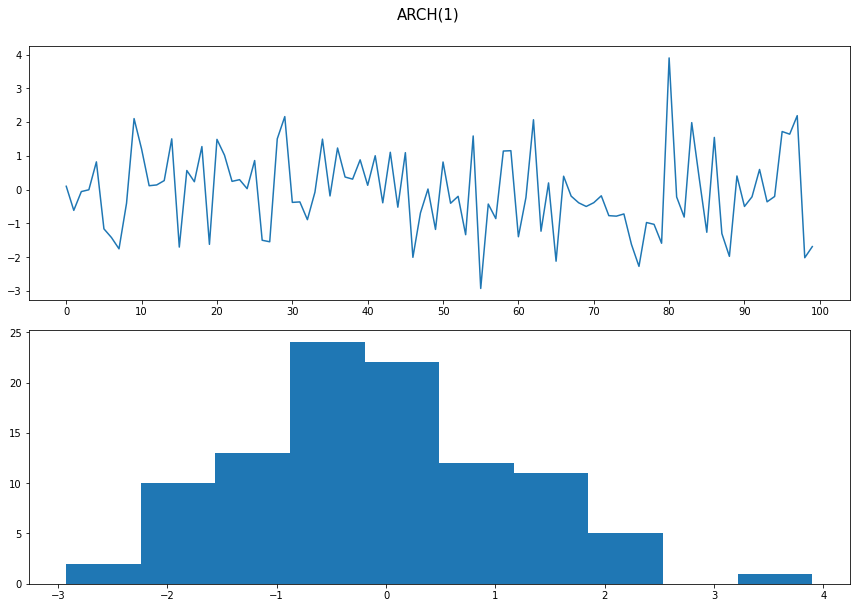

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("ARCH(1)", y=1.05, fontsize=15)
ax[0].plot(np.arange(0, 100, 1), at)
ax[0].set_xticks(np.arange(0, 110, 10))
ax[1].hist(at)
plt.tight_layout()

In [17]:
from scipy import stats as st

Skewx = st.skew(at)
kurtox = st.kurtosis(at, fisher=False)

print("Skewness= ", Skewx)
print("Kurtosis=", kurtox)

Skewness=  0.2921073526231051
Kurtosis= 3.0582384459385805


The distribution is roughly symmetric, but the simulated ARCH(1) model's kurtosis turned out to be greater than 1.

In [18]:
at2 = np.zeros(100)
c0 = 0.9
c1 = np.sqrt(.31)
c2 = np.sqrt(.25)
sigSq = np.zeros(100)
sigSq[0] = 0.8
w = np.random.normal(size=(100))
at2[0] = 0.1
sigSq[1] = c0 + c1 * at2[0]**2
at2[1] = np.sqrt(sigSq[1]) * w[1]

for i in range(2, len(at2)):
    sigSq[i] = c0 + c1 * at2[i-1]**2 + c2 * at2[i - 2]**2
    at2[i] = np.sqrt(sigSq[i]) * w[i]

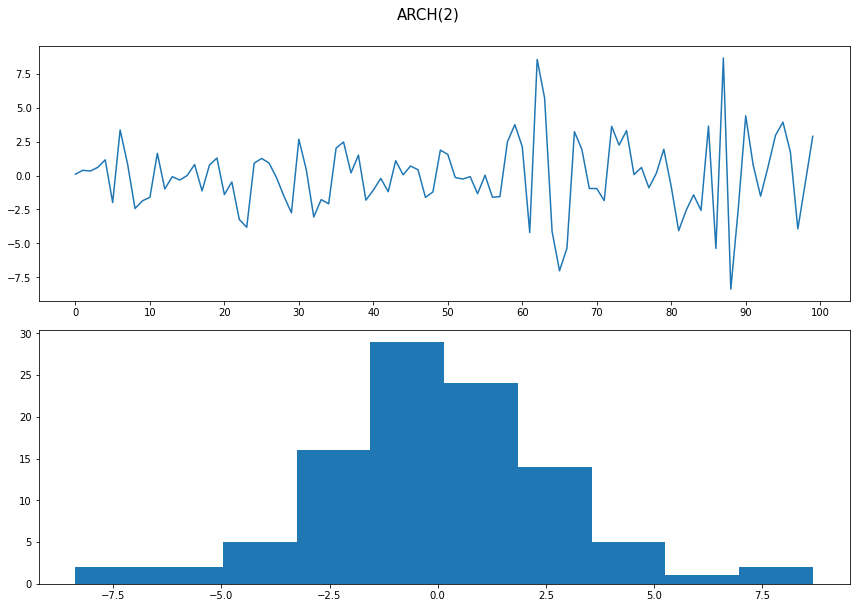

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("ARCH(2)", y=1.05, fontsize=15)
ax[0].plot(np.arange(0, 100, 1), at2)
ax[0].set_xticks(np.arange(0, 101, 10))
ax[1].hist(at2)
plt.tight_layout()

In [20]:
Skewx = st.skew(at2)
kurtox = st.kurtosis(at2, fisher=False)

print("Skewness= ", Skewx)
print("Kurtosis=", kurtox)

Skewness=  0.15683326553063803
Kurtosis= 4.597666160381414


The distribution is left-skewed, but the simulated ARCH(2) Model's kurtosis is much greater than 3 and even greater than that of ARCH(1) above.

### Problem 4 : How does using the ARCH model change your value at risk vs using just a normal model for % daily change in price?  Use simulations to compute the difference. 

In [21]:
print("ARCH Model shock VaR:", np.sqrt(np.var(at)) * 3.841) #Chi-square distribution
print("Normal Model Shock VaR:", np.sqrt(np.var(w)) * 1.645) #Normal distribution

ARCH Model shock VaR: 4.651098947683803
Normal Model Shock VaR: 1.657104079462193


At 95% confidence level, ARCH Model can produce much higher shock to the stock price than Normal Distribution Model.